            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole     No Intervention  
1                              American Bison, Bison     No Intervention  
2  Aurochs, Aurochs, Domestic 

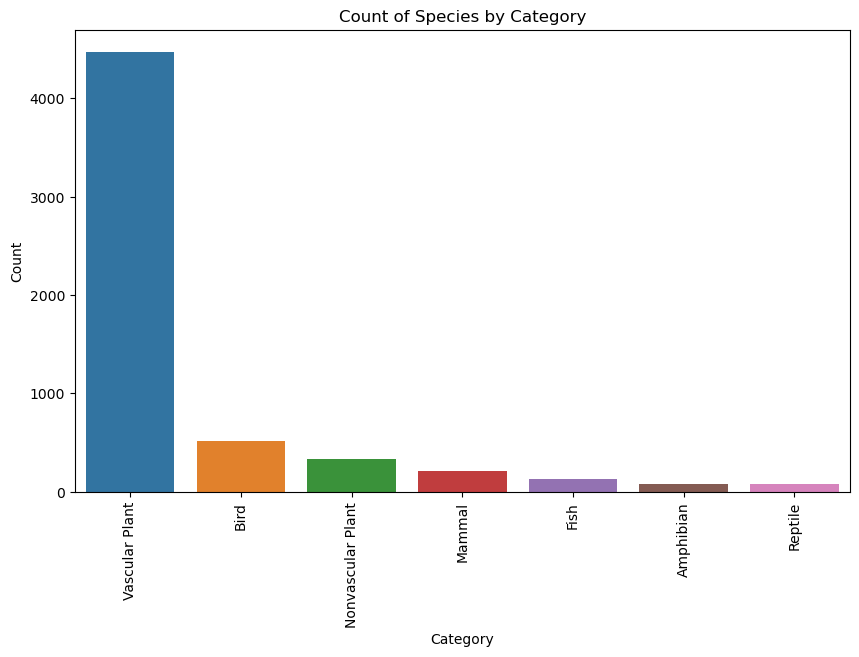

No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


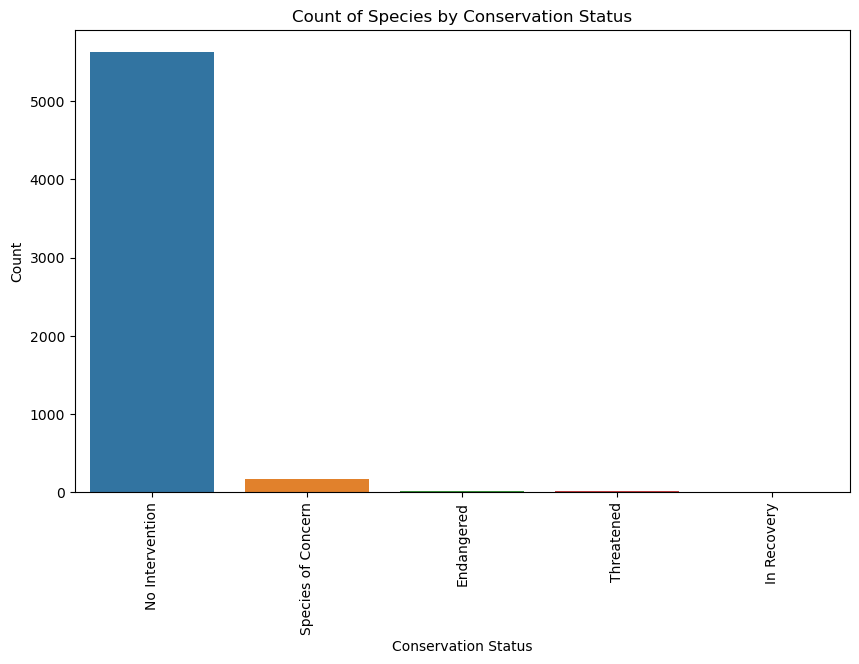

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


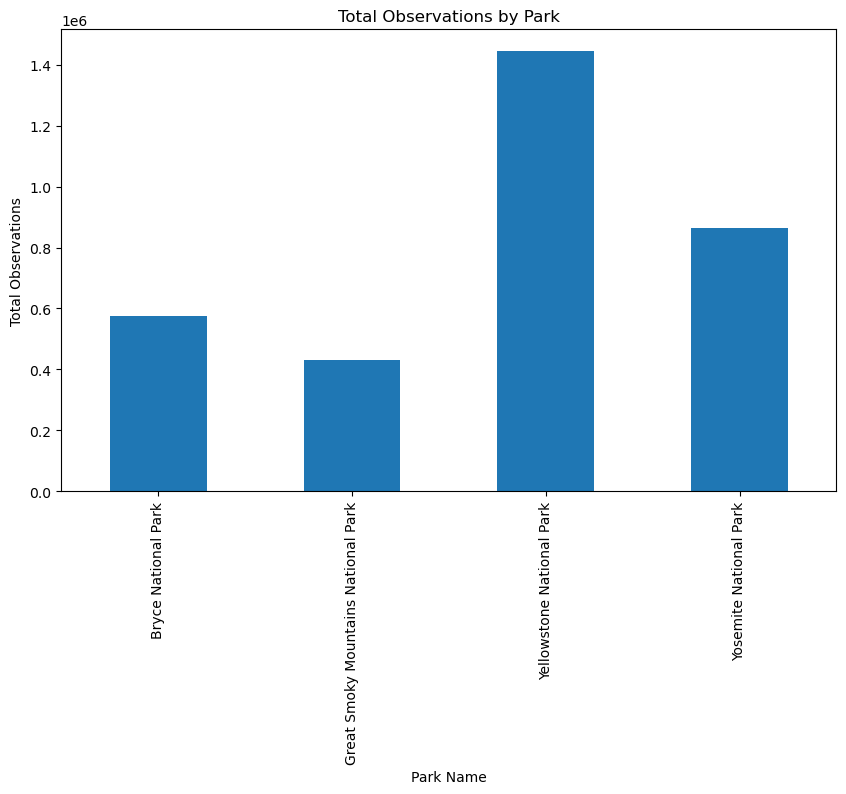

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

# Display the first few rows of each dataframe
print(observations.head())
print(species.head())

# Display the shape and columns of each dataframe
print("Shape of observations:", observations.shape)
print("Columns of observations:", observations.columns)
print("Shape of species:", species.shape)
print("Columns of species:", species.columns)

# Display unique values and total observations in the observations dataframe
print(observations.nunique())
print(observations.park_name.unique())
print("Total observations:", observations.observations.sum())

# Fill missing values in conservation_status with 'No Intervention'
species['conservation_status'].fillna('No Intervention', inplace=True)

# Display the count of each conservation status
print(species['conservation_status'].value_counts())

# Merge the species and observations dataframes on scientific_name
merged_data = pd.merge(species, observations, on='scientific_name')

# Display the first few rows of the merged dataframe
print(merged_data.head())

# Save the merged dataframe to a CSV file
merged_data.to_csv('merged_data.csv', index=False)

# Additional analysis: Count of species by category
species_by_category = species['category'].value_counts()
print(species_by_category)

# Plot the count of species by category
plt.figure(figsize=(10, 6))
sns.countplot(data=species, x='category', order=species_by_category.index)
plt.title('Count of Species by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Additional analysis: Count of species by conservation status
species_by_status = species['conservation_status'].value_counts()
print(species_by_status)

# Plot the count of species by conservation status
plt.figure(figsize=(10, 6))
sns.countplot(data=species, x='conservation_status', order=species_by_status.index)
plt.title('Count of Species by Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Additional analysis: Total observations by park
observations_by_park = observations.groupby('park_name')['observations'].sum()
print(observations_by_park)

# Plot the total observations by park
plt.figure(figsize=(10, 6))
observations_by_park.plot(kind='bar')
plt.title('Total Observations by Park')
plt.xlabel('Park Name')
plt.ylabel('Total Observations')
plt.xticks(rotation=90)
plt.show()
